In [7]:
import zipfile
import os
import random # Import the random library
import numpy as np # Import numpy
from sklearn.model_selection import train_test_split # Import train_test_split
import cv2 as cv # Import opencv

zip_path = r'/content/test_set.zip'
extract_dir = r'/content/test_set_extracted'
if not os.path.exists(extract_dir):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    print(f"Extracted zip file to {extract_dir}")
else:
    print(f"Extraction directory already exists: {extract_dir}")

print("Contents of extracted directory:")
for root, dirs, files in os.walk(extract_dir):
    level = root.replace(extract_dir, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        print(f'{subindent}{f}')

dir = os.path.join(extract_dir, 'test_set')
categories = ['Cats', 'Dogs']
data = []

if os.path.isdir(dir):
    for category in categories:
        path = os.path.join(dir, category)
        label = categories.index(category)

        if os.path.isdir(path):
            for img in os.listdir(path):
                imgpath = os.path.join(path, img)
                try:
                    pet_img = cv.imread(imgpath, 0)
                    if pet_img is not None:
                        pet_img = cv.resize(pet_img, (100, 100), interpolation=cv.INTER_AREA)
                        image = np.array(pet_img).flatten()
                        data.append([image, label])
                except Exception as e:
                    print(f"Error processing image {imgpath}: {e}")
                    continue
        else:
            print(f"Path is not a directory: {path}")
else:
    print(f"Root directory for images not found: {dir}")


print(f"Loaded {len(data)} images.")

random.shuffle(data)

features = []
labels = []

for feature, label in data:
    features.append(feature)
    labels.append(label)

features = np.array(features)
labels = np.array(labels)

if len(data) > 0:
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

    print(f"Training data shape: {X_train.shape}")
    print(f"Testing data shape: {X_test.shape}")
else:
    print("No data loaded, cannot split into training and testing sets.")

Extraction directory already exists: /content/test_set_extracted
Contents of extracted directory:
test_set_extracted/
    task 3.py
    test_set/
        dogs/
            dog.4447.jpg
            dog.4158.jpg
            dog.4105.jpg
            dog.4415.jpg
            dog.4572.jpg
            dog.4750.jpg
            dog.4731.jpg
            dog.4190.jpg
            dog.4843.jpg
            dog.4143.jpg
            dog.4033.jpg
            dog.4665.jpg
            dog.4747.jpg
            dog.4507.jpg
            dog.4361.jpg
            dog.4860.jpg
            dog.4380.jpg
            dog.4795.jpg
            dog.4684.jpg
            dog.4332.jpg
            dog.4078.jpg
            dog.4819.jpg
            dog.4573.jpg
            dog.4444.jpg
            dog.4418.jpg
            dog.4656.jpg
            dog.4977.jpg
            dog.4225.jpg
            dog.4522.jpg
            dog.4509.jpg
            dog.4101.jpg
            dog.4252.jpg
            dog.4936.jpg
            dog

In [8]:
dir = os.path.join(extract_dir, 'test_set')
categories = ['cats', 'dogs']
data = []

if os.path.isdir(dir):
    for category in categories:
        path = os.path.join(dir, category)
        label = categories.index(category)

        if os.path.isdir(path):
            for img in os.listdir(path):
                imgpath = os.path.join(path, img)
                try:
                    pet_img = cv.imread(imgpath, 0)
                    if pet_img is not None:
                        pet_img = cv.resize(pet_img, (100, 100), interpolation=cv.INTER_AREA)
                        image = np.array(pet_img).flatten()
                        data.append([image, label])
                except Exception as e:
                    print(f"Error processing image {imgpath}: {e}")
                    continue
        else:
            print(f"Path is not a directory: {path}")
else:
    print(f"Root directory for images not found: {dir}")


print(f"Loaded {len(data)} images.")

random.shuffle(data)

features = []
labels = []

for feature, label in data:
    features.append(feature)
    labels.append(label)

features = np.array(features)
labels = np.array(labels)

if len(data) > 0:
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

    print(f"Training data shape: {X_train.shape}")
    print(f"Testing data shape: {X_test.shape}")
else:
    print("No data loaded, cannot split into training and testing sets.")

Loaded 2023 images.
Training data shape: (1618, 10000)
Testing data shape: (405, 10000)


In [10]:
from sklearn.svm import SVC # Import the SVC class

model = SVC(kernel='rbf')

if 'X_train' in locals() and 'y_train' in locals() and len(X_train) > 0:
    model.fit(X_train, y_train)
    print("Model training complete.")
else:
    print("Training data (X_train or y_train) not available or empty. Cannot train the model.")

Model training complete.


In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

if 'model' in locals() and 'X_test' in locals():
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=categories)) # Use the 'categories' list for target names

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
else:
    print("Model or test data (X_test) not available. Cannot perform evaluation.")

Accuracy: 0.5876543209876544

Classification Report:
              precision    recall  f1-score   support

        cats       0.58      0.51      0.54       194
        dogs       0.59      0.66      0.62       211

    accuracy                           0.59       405
   macro avg       0.59      0.58      0.58       405
weighted avg       0.59      0.59      0.59       405


Confusion Matrix:
[[ 99  95]
 [ 72 139]]


In [12]:

def preprocess_image(image_path):
    pet_img = cv.imread(image_path, 0)
    if pet_img is not None:
        pet_img = cv.resize(pet_img, (100, 100), interpolation=cv.INTER_AREA)
        image = np.array(pet_img).flatten()
        return image.reshape(1, -1)
    else:
        return None


image_to_predict_path = '/content/test_set_extracted/test_set/dogs/dog.4001.jpg'
preprocessed_image = preprocess_image(image_to_predict_path)

if preprocessed_image is not None:

    if 'model' in locals():
        prediction = model.predict(preprocessed_image)
        predicted_category = categories[prediction[0]]
        print(f"The image is predicted to be a: {predicted_category}")
    else:
        print("The model has not been trained yet. Please train the model first.")
else:
    print(f"Could not load or preprocess the image: {image_to_predict_path}")

The image is predicted to be a: dogs


Accuracy : 0.5876543209876544
Prediction is dogs


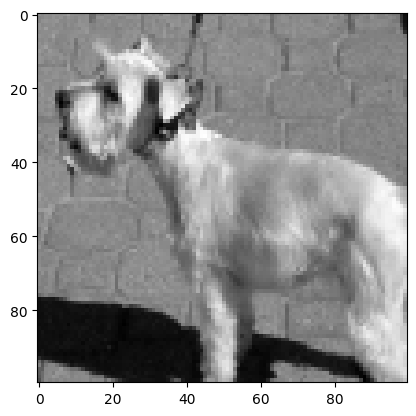

In [14]:
import matplotlib.pyplot as plt

mypet = X_test[2].reshape(100,100)
prediction = model.predict(X_test)
accuracy = model.score(X_test,y_test)
print('Accuracy :', accuracy)
print('Prediction is', categories[prediction[2]])
plt.imshow(mypet, cmap ='gray')
plt.show()